# Assignment 1: Experiment with handwritten text recognition using different optimization methods provided in Keras.

In [1]:
# Using tensorflow-gpu 2.3.1
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# parameters setup

EPOCHS = 50 # the number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset

BATCH_SIZE = 128 # the batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters

VERBOSE = 1 # used for decide how much output we want when training the model

NB_CLASSES = 10 # number of outputs = number of digits (from 0 ~ 9)

N_HIDDEN = 128 # positive integer, dimensionality of the output space

VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

DROPOUT = 0.3 # the ratio of dropout variable

In [4]:
# loading MNIST dataset, verifing the split between train and test is 60,000, and 10,000 respectly.
# one-hot is automatically applied.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# applying normalization in [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# one-hot
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 test samples


## Using optimizer SGD (stochastic gradient decent)

In [29]:
# build the model

# sequential provides training and inference features on this model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
		input_shape=(RESHAPED,),
		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [30]:
# compile the model with SGD optimizer
model.compile(optimizer='SGD', 
			loss='categorical_crossentropy',
			metrics=['accuracy'])

# train the moodel
history = model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 0s 1ms/step - loss: 1.7382 - accuracy: 0.4475 - val_loss: 0.9470 - val_accuracy: 0.8034
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 0.9404 - accuracy: 0.7086 - val_loss: 0.5451 - val_accuracy: 0.8667
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.7835 - val_loss: 0.4317 - val_accuracy: 0.8860
Epoch 4/50
375/375 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.8186 - val_loss: 0.3771 - val_accuracy: 0.8956
Epoch 5/50
375/375 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.8385 - val_loss: 0.3436 - val_accuracy: 0.9025
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.8535 - val_loss: 0.3197 - val_accuracy: 0.9092
Epoch 7/50
375/375 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8632 - val_loss: 0.3032 - val_accuracy: 0.9128
Epoch 

In [31]:
# evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy of SGD :', test_acc)

313/313 [==============================] - 0s 468us/step - loss: 0.1221 - accuracy: 0.9629
Test accuracy of SGD : 0.9628999829292297


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


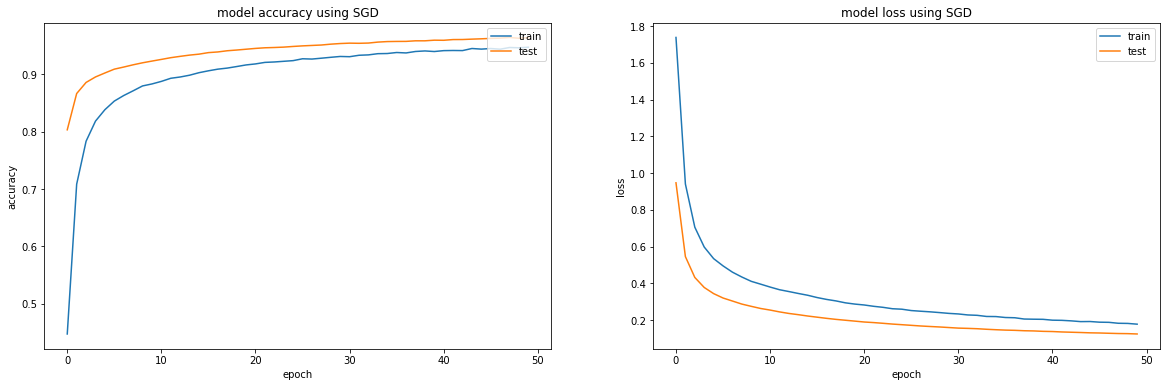

In [32]:
# list all data in history
print(history.history.keys())

# set up side-by-side training process plots display
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy using SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss using SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## Using optimizer SGD with different momentum

### Momentum = 0.9

In [34]:
# build the model

# sequential provides training and inference features on this model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
		input_shape=(RESHAPED,),
		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [35]:
# momentum = 0.9

# setting up the optimization of our weights
"""
Arguments of SGD(lr, decay, momentum, nesterov)

lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter updates momentum.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
"""
sgd = keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# compile the model
model.compile(optimizer=sgd, 
			loss='categorical_crossentropy',
			metrics=['accuracy'])

# train the moodel
history = model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 0.4095 - accuracy: 0.8741 - val_loss: 0.1516 - val_accuracy: 0.9548
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.9345 - val_loss: 0.1443 - val_accuracy: 0.9576
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9442 - val_loss: 0.1036 - val_accuracy: 0.9676
Epoch 4/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9527 - val_loss: 0.1015 - val_accuracy: 0.9697
Epoch 5/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9560 - val_loss: 0.0949 - val_accuracy: 0.9719
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.9583 - val_loss: 0.0990 - val_accuracy: 0.9694
Epoch 7/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9604 - val_loss: 0.0919 - val_accuracy: 0.9736
Epoch 

In [36]:
# evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy of SGD with momentum = 0.9 :', test_acc)

313/313 [==============================] - 0s 468us/step - loss: 0.0903 - accuracy: 0.9784
Test accuracy of SGD with momentum = 0.9 : 0.9783999919891357


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


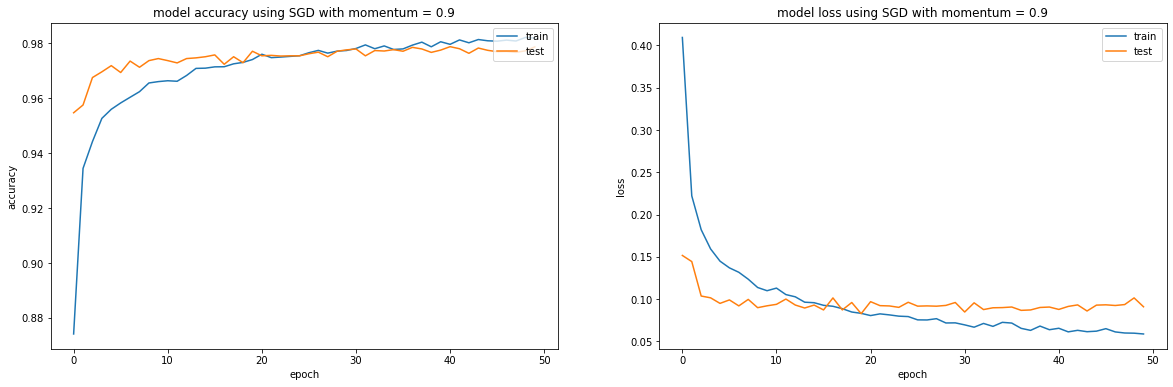

In [37]:
# list all data in history
print(history.history.keys())

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy using SGD with momentum = 0.9')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss using SGD with momentum = 0.9')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

### Momentum = 0.1

In [38]:
# build the model

# sequential provides training and inference features on this model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
		input_shape=(RESHAPED,),
		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [39]:
# momentum = 0.1

# setting up the optimization of our weights
"""
Arguments of SGD(lr, decay, momentum, nesterov)

lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter updates momentum.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
"""
sgd = keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.1, nesterov=True)

# compile the model
model.compile(optimizer=sgd, 
			loss='categorical_crossentropy',
			metrics=['accuracy'])

# train the moodel
history = model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 0.6642 - accuracy: 0.7951 - val_loss: 0.2576 - val_accuracy: 0.9241
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.9017 - val_loss: 0.1964 - val_accuracy: 0.9423
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2645 - accuracy: 0.9220 - val_loss: 0.1621 - val_accuracy: 0.9526
Epoch 4/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9348 - val_loss: 0.1427 - val_accuracy: 0.9586
Epoch 5/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9411 - val_loss: 0.1284 - val_accuracy: 0.9625
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9466 - val_loss: 0.1192 - val_accuracy: 0.9639
Epoch 7/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1660 - accuracy: 0.9498 - val_loss: 0.1150 - val_accuracy: 0.9657
Epoch 

In [40]:
# evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy of SGD with momentum = 0.1 :', test_acc)

313/313 [==============================] - 0s 470us/step - loss: 0.0806 - accuracy: 0.9782
Test accuracy of SGD with momentum = 0.1 : 0.9782000184059143


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


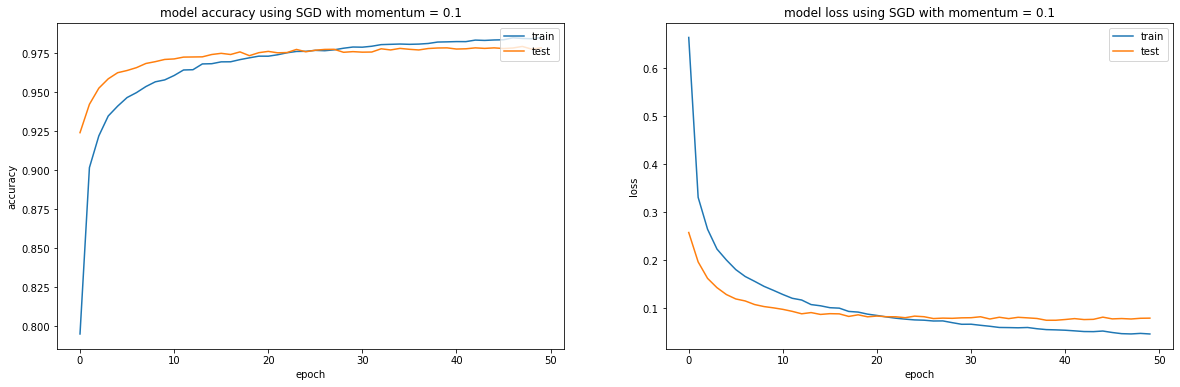

In [41]:
# list all data in history
print(history.history.keys())

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy using SGD with momentum = 0.1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss using SGD with momentum = 0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## Using optimizer Adagrad

In [42]:
# build the model

# sequential provides training and inference features on this model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
		input_shape=(RESHAPED,),
		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [43]:
# compile the model
model.compile(optimizer='Adagrad', 
			loss='categorical_crossentropy',
			metrics=['accuracy'])

# train the moodel
history = model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 2.1226 - accuracy: 0.2476 - val_loss: 1.8005 - val_accuracy: 0.6488
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 1.7074 - accuracy: 0.4963 - val_loss: 1.3284 - val_accuracy: 0.7481
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 1.3732 - accuracy: 0.6017 - val_loss: 1.0056 - val_accuracy: 0.7952
Epoch 4/50
375/375 [==============================] - 0s 1ms/step - loss: 1.1485 - accuracy: 0.6612 - val_loss: 0.8135 - val_accuracy: 0.8216
Epoch 5/50
375/375 [==============================] - 0s 1ms/step - loss: 1.0149 - accuracy: 0.6938 - val_loss: 0.6982 - val_accuracy: 0.8398
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.9153 - accuracy: 0.7208 - val_loss: 0.6210 - val_accuracy: 0.8551
Epoch 7/50
375/375 [==============================] - 0s 1ms/step - loss: 0.8472 - accuracy: 0.7407 - val_loss: 0.5672 - val_accuracy: 0.8635
Epoch 

In [44]:
# evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy of Adagrad :', test_acc)

313/313 [==============================] - 0s 474us/step - loss: 0.2622 - accuracy: 0.9234
Test accuracy of Adagrad : 0.9233999848365784


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


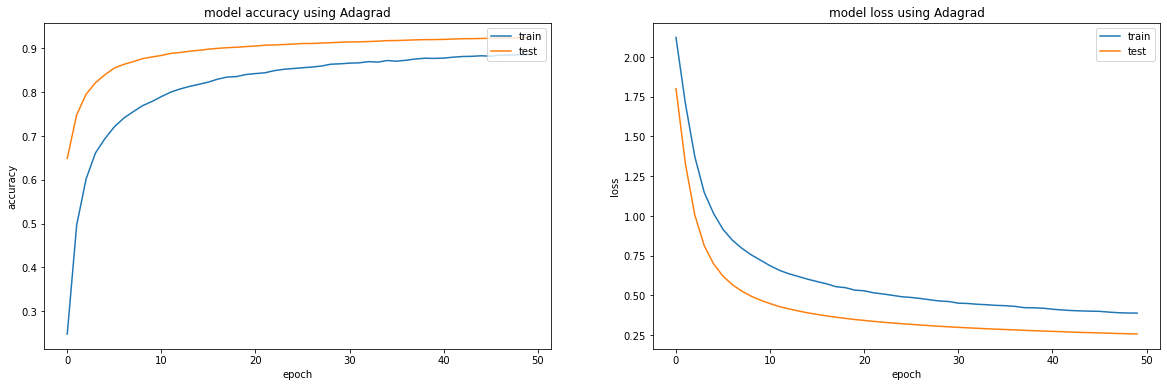

In [45]:
# list all data in history
print(history.history.keys())

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy using Adagrad')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss using Adagrad')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## Using optimizer RMSprop

In [46]:
# build the model

# sequential provides training and inference features on this model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
		input_shape=(RESHAPED,),
		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [47]:
# compile the model
model.compile(optimizer='RMSprop', 
			loss='categorical_crossentropy',
			metrics=['accuracy'])

# train the moodel
history = model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.8554 - val_loss: 0.1832 - val_accuracy: 0.9454
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.9311 - val_loss: 0.1409 - val_accuracy: 0.9578
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9480 - val_loss: 0.1204 - val_accuracy: 0.9646
Epoch 4/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9554 - val_loss: 0.1103 - val_accuracy: 0.9683
Epoch 5/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9602 - val_loss: 0.0989 - val_accuracy: 0.9711
Epoch 6/50
375/375 [==============================] - 1s 1ms/step - loss: 0.1176 - accuracy: 0.9655 - val_loss: 0.1043 - val_accuracy: 0.9701
Epoch 7/50
375/375 [==============================] - 1s 1ms/step - loss: 0.1095 - accuracy: 0.9678 - val_loss: 0.0958 - val_accuracy: 0.9736
Epoch 

In [48]:
# evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy of RMSprop :', test_acc)

313/313 [==============================] - 0s 505us/step - loss: 0.1506 - accuracy: 0.9786
Test accuracy of RMSprop : 0.978600025177002


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


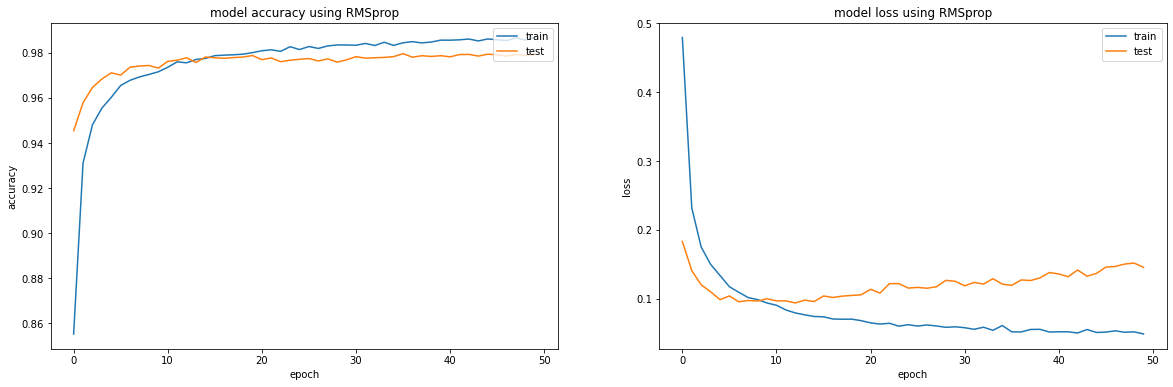

In [49]:
# list all data in history
print(history.history.keys())

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy using RMSprop')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss using RMSprop')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## Using optimizer Adam

In [51]:
# build the model

# sequential provides training and inference features on this model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
		input_shape=(RESHAPED,),
		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [52]:
# compile the model
model.compile(optimizer='Adam', 
			loss='categorical_crossentropy',
			metrics=['accuracy'])

# train the moodel
history = model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 0.5158 - accuracy: 0.8435 - val_loss: 0.1955 - val_accuracy: 0.9432
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.9327 - val_loss: 0.1359 - val_accuracy: 0.9595
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9469 - val_loss: 0.1198 - val_accuracy: 0.9629
Epoch 4/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9562 - val_loss: 0.1038 - val_accuracy: 0.9697
Epoch 5/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9617 - val_loss: 0.0972 - val_accuracy: 0.9704
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9622 - val_loss: 0.0952 - val_accuracy: 0.9717
Epoch 7/50
375/375 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9682 - val_loss: 0.0889 - val_accuracy: 0.9735
Epoch 

In [53]:
# evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy of Adam :', test_acc)

313/313 [==============================] - 0s 483us/step - loss: 0.0875 - accuracy: 0.9801
Test accuracy of Adam : 0.9800999760627747


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


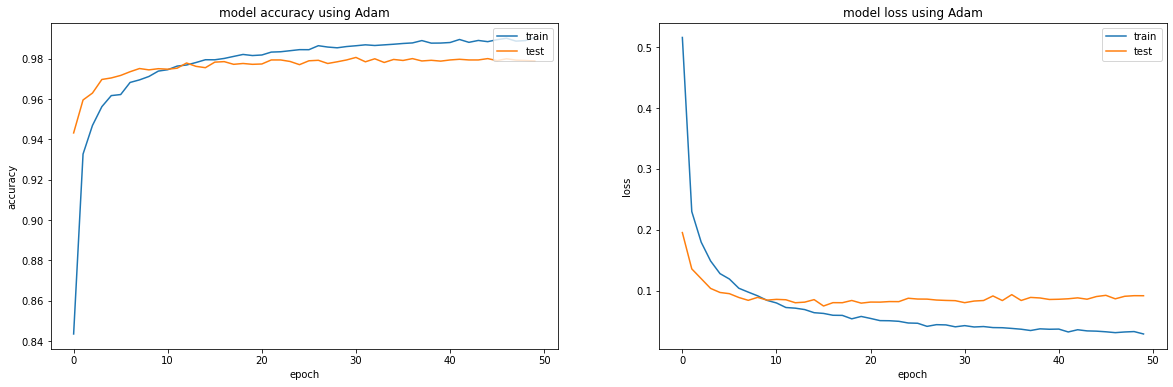

In [54]:
# list all data in history
print(history.history.keys())

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy using Adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss using Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()